# MCMC benchmarks

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Observations

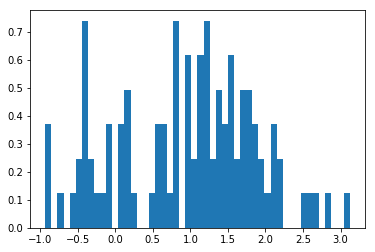

In [2]:
num_observations = 100
theta_true = 1.


N = torch.distributions.normal.Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations])).view(-1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Metropolis-Hastings

In [3]:
def log_likelihood(theta, observations):
    with torch.no_grad():
        N = torch.distributions.normal.Normal(theta.item(), 1.)
        likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [4]:
from hypothesis.transition import NormalTransitionDistribution
from hypothesis.transition import UniformTransitionDistribution

transition = NormalTransitionDistribution(.1)

In [5]:
from hypothesis.inference import MetropolisHastings

sampler = MetropolisHastings(log_likelihood, transition)

In [6]:
theta_0 = torch.tensor(5).float()
result_mh = sampler.infer(
    observations,
    theta_0=theta_0,
    samples=50000,
    burnin_steps=1000)

## Hamiltonian Monte Carlo

In [7]:
def log_likelihood(theta, observations):
    N = torch.distributions.normal.Normal(theta, 1.)
    likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [8]:
from hypothesis.inference import HamiltonianMonteCarlo

leapfrog_steps = 50
leapfrog_stepsize = .01
momentum = torch.distributions.normal.Normal(0, 1)
sampler = HamiltonianMonteCarlo(log_likelihood, leapfrog_steps, leapfrog_stepsize)

In [9]:
theta_0 = torch.tensor(5).float()
result_hmc = sampler.infer(
    observations,
    theta_0=theta_0,
    samples=50000,
    burnin_steps=1000)

## Summary

In [17]:
from hypothesis.visualization.mcmc import plot_trace
from hypothesis.visualization.mcmc import plot_autocorrelation
from hypothesis.visualization.mcmc import plot_density

figure_height = 20
figure_width = 20

## Densities

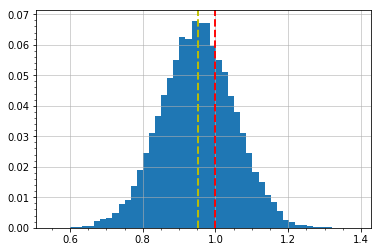

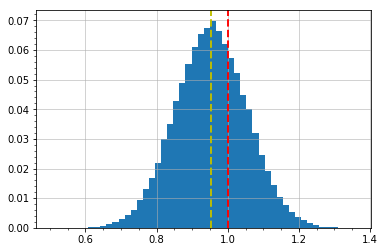

In [24]:
plot_density(result_mh, show_mean=True, truth=theta_true, bins=50)
plt.show()

plot_density(result_hmc, show_mean=True, truth=theta_true, bins=50)
plt.show()

### Obtained MAP

In [11]:
print("Metropolis-Hastings", result_mh.mean().item())
print("Hamiltonian Monte Carlo", result_hmc.mean().item())

Metropolis-Hastings 0.9512552618980408
Hamiltonian Monte Carlo 0.9533597826957703


### Traceplots

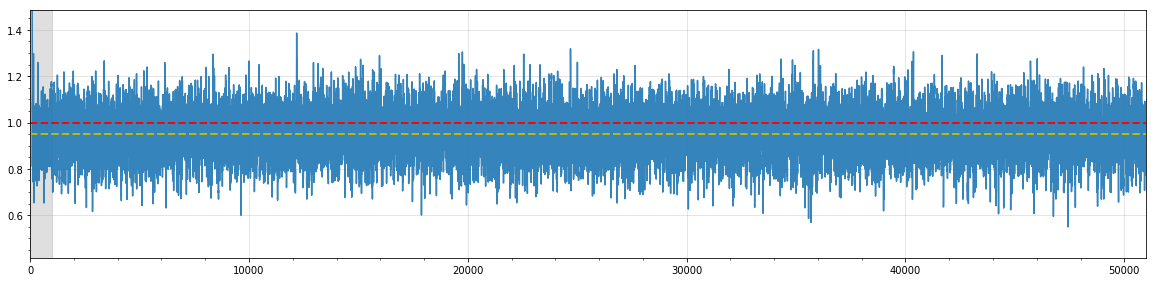

In [12]:
fig, axes = plot_trace(result_mh, truth=theta_true, aspect=1, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

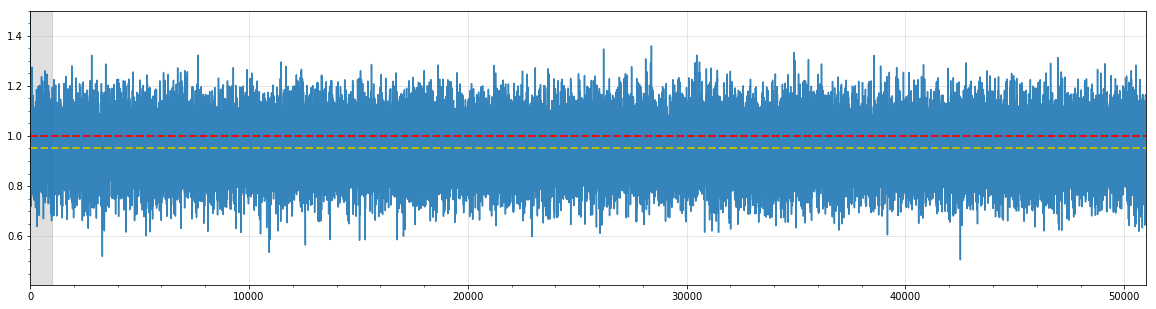

In [13]:
fig, axes = plot_trace(result_hmc, truth=theta_true, aspect=2.5, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

### Autocorrelation

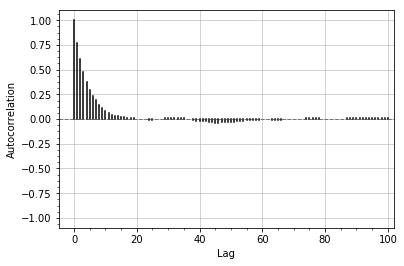

In [14]:
# Metropolis-Hastings
plot_autocorrelation(result_mh, max_lag=100, interval=1)
plt.show()

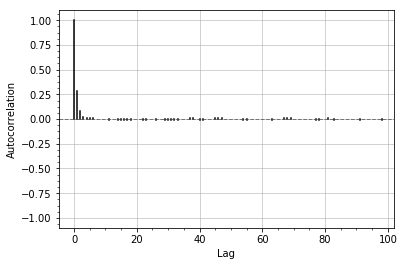

In [15]:
# Hamiltonian Monte Carlo
plot_autocorrelation(result_hmc, max_lag=100, interval=1)
plt.show()

## Effective sizes

In [16]:
print("Effective size MH:", result_mh.effective_size())
print("Effective size HMC:", result_hmc.effective_size())

Effective size MH: 4959
Effective size HMC: 12928
